# CSC 314: Final Exam Study Guide

This final exam will be similar to the projects we have been working on in Chapter 5, 6, and 7 of the textbook.

1. Pandas & COVID-19 (20 points)
* Euclidean Distance (5 points)
* A short Data Mining/Machine Learning Function \#1 (5 points)
* A short Data Mining/Machine Learning Function \#2 (10 points)
* A short Data Mining/Machine Learning Function \#3 (10 points)
* Data Mining/Machine Learning Function (10 points)
* Image Processing Function \#1 (20 points)
* Image Processing Function \#2 (20 points)

You may work together in studying for the test but on the final exam you will **not** be allowed to consult other people for help. On the final exam you may use the book, your notes, and standard internet resources.

The final exam will require you to submit your work as a python notebook.

## Pandas & Covid-19

You will need to write code to download COVID-19 death information from the JHU GitHub page. You will perform some simple manipulations to the data and print the first 10 rows of a DataFrame to the screen. Here are two hints that are given on the final exam:

**Hint 1:** Remember that JHU publishes cumulative death numbers, so you will need to perform some simple math with the last two columns in the data.

**Hint 2:** The DataFrame function `sort_values(column_name)` will be helpful. By default this function sorts in ascending order. You can change the order by passing the value `ascending=False`. We can solve the problem using ascending order or using descending order, the choice is yours.

In [ ]:
import pandas as pd
# Downloads the data from 
covid_path = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/"
covid_file = "time_series_covid19_deaths_US.csv"
covid = pd.read_csv(covid_path + covid_file, delimiter=",")
# COMPLETE THE DISTANCE TO NEIGHBOR ALGORITHM HERE
# IT CAN BE DONE IN 5-15 LINES OF CODE
covid



# Testing -- WARNING: THIS REPORT WAS GENERATED FROM DECEMBER 5ths DATA
# Test results are included in the real final exam

## Image Processing Function \#1

We spent quite a bit of class time creating image filters and our previous projects displayed two images side-by-side. One image was the original and other image was the filtered version. The red-to-green algorithm is different because it modifies the original image in-place and only shows the modified version. Since the red-to-green algorithm does not need to create a full duplicate of the image, it only processes a portion of the image: those pixels whose xy-coordinates are located near the red/green bow. We identify the bow's general area with a bounding box.

The red-green algorithm is actually quite simple, assuming that you were given a small bounding box around the bow:

```
Any pixel whose red component is 1.2 times it green component and 1.2 times it blue component will need to be converted.
Red to green conversion is accomplished by swapping the red and green component values.
```

Here is an example of the algorithm on our test file.

#### <center>Original Image</center> ####
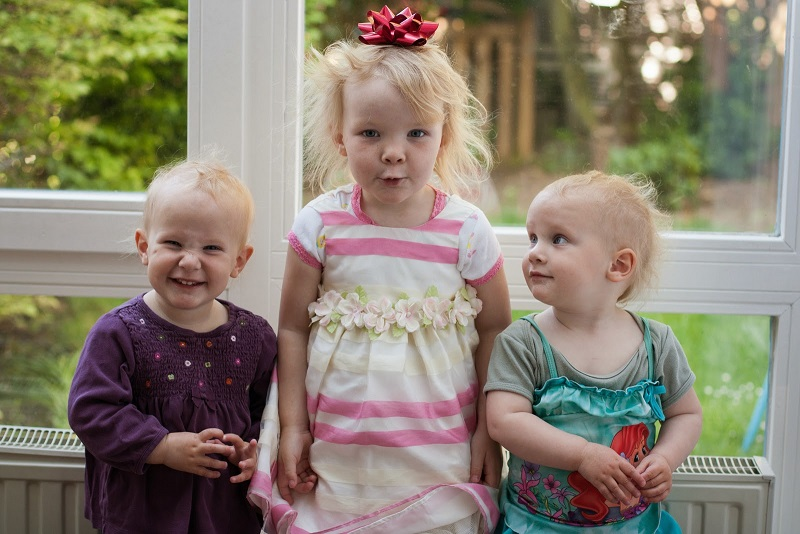

#### <center>Red Bow Turned Green</center> ####
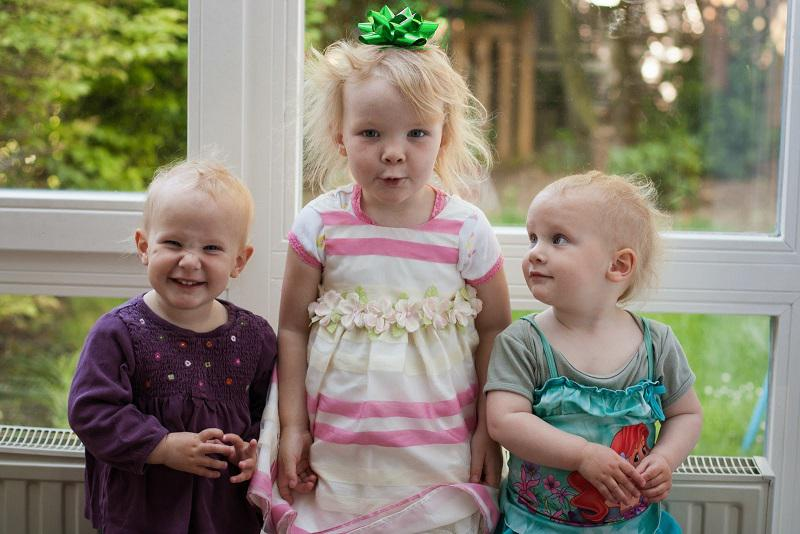


Right now the skeleton code opens a window that displays the original image. Your task is to complete the red eye removal function so that it removes the red eye from this picture of baby Hannah. Make sure that you download the `red_bow_girls.jpg` file and place it in the same directory as this notebook. For the `red_bow_girls.jpg` file, the bow bounding box goes from $(350, 0) \rightarrow (450, 50)$.

Be careful because the y-axis is flipped: the smallest y-value is at the top of the image and largest y-value is at the bottom.

In [ ]:
import image

def bow_red_to_green(picture, bbox_left, bbox_top, bbox_right, bbox_bottom):

    # Step through all the pixels within this bounding box
    for x in range(bbox_left, bbox_right):
        for y in range(bbox_top, bbox_bottom):
            
            pixel = picture.getPixel(x, y)
            red = pixel.getRed()
            green = pixel.getGreen()
            blue = pixel.getBlue()
            # Any pixel whose red component is 1.2 times it green component and 1.2 times it blue component will need to 
            # be converted. Red to green conversion is accomplished by swapping the red and green component values.
            if(red >= 1.2 * green and red >= 1.2 * blue):
                pixel = image.Pixel(green,red,blue)
            
            picture.setPixel(x, y, pixel)
            
    return picture


# Open the original image and convert the red bow to green
picture = image.FileImage("red_bow_girls.jpg")
bow_red_to_green(picture, 350, 0, 450, 50)

# Create the picture in a window
window = image.ImageWin(picture.getWidth(), picture.getHeight(), "Color Enhancing Contacts")
picture.draw(window)

# Hold the window until the user clicks somewhere on it
window.exitonclick()

## 8. Red Bow Highlights (20 points)

The image processing problems were well received by the class, so the second exam problem is to highlight the red in the bow. We'll also turn the rest of the image to grayscale so that the bow really stands out.

The red highlights algorithm is a bit more complicated than the red-to-green algorithm because it has to examine every pixel and decide whether the pixel should be converted to grayscale or keep the red:

```
Any pixel outside the bounding box will be converted to grayscale
Within the bounding box, any pixel whose red component is 1.2 times it green component and 1.2 times it blue component will need to remain unchanged. The rest should also be converted to grayscale
```

Here is an example of the algorithm on our test file.

#### <center>Original Image</center> ####
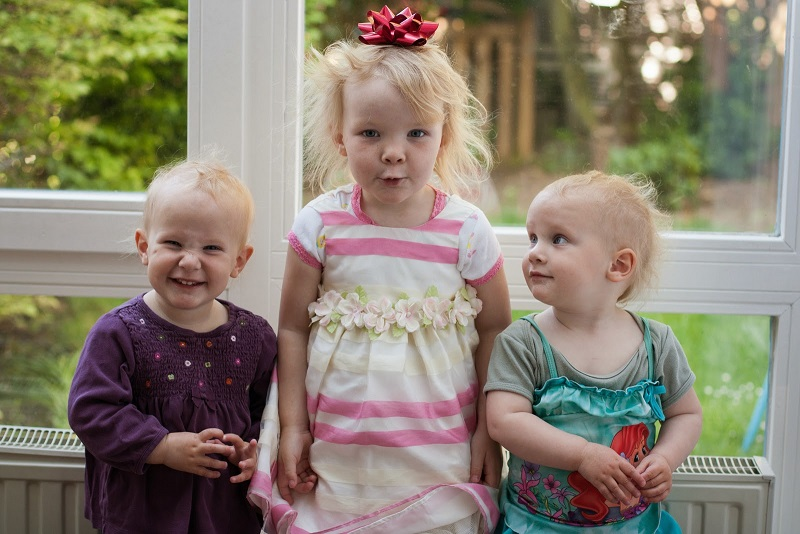

#### <center>Red Bow Highlighted</center> ####
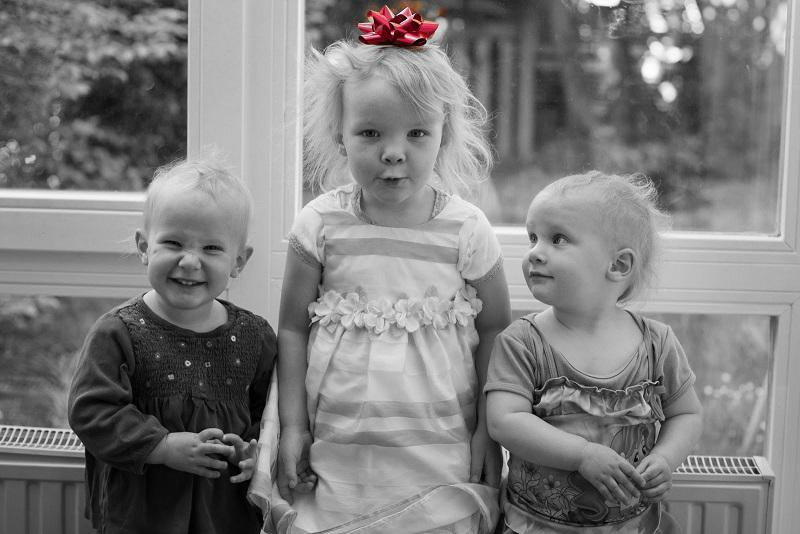

Right now the skeleton code opens a window that displays the original image. Your task is to complete the red highlight function so that it highlights the red bow and converts everything else to grayscale. Make sure that you download the `red_bow_girls.jpg` file and place it in the same directory as this notebook. For the `red_bow_girls.jpg` file, the bow bounding box goes from $(350, 0) \rightarrow (450, 50)$.

Be careful because the y-axis is flipped: the smallest y-value is at the top of the image and largest y-value is at the bottom.

In [ ]:
import image

def red_bow_highlights(picture, bbox_left, bbox_top, bbox_right, bbox_bottom):

    width  = picture.getWidth()
    height = picture.getHeight()

    # Step through every pixel in the image
    for x in range(width):
        for y in range(height):
            
            pixel = picture.getPixel(x, y)
            
            r = pixel.getRed()
            g = pixel.getGreen()
            b = pixel.getBlue()
            avgRGB = int((r+g+b)/3)
            
            if(x > bbox_left and x < bbox_right and y < bbox_bottom and y > bbox_top and r >= 1.38 * g and r > 1.35 * b):
                newPixel = image.Pixel(r, g, b)
            else:
                newPixel = image.Pixel(avgRGB, avgRGB, avgRGB)
                
            
            
            picture.setPixel(x, y, newPixel)    
            
    return picture


# Open the original image and enhance the eye color
picture = image.FileImage("red_bow_girls.jpg")
red_bow_highlights(picture, 350, 0, 450, 50)

# Create the picture in a window
window = image.ImageWin(picture.getWidth(), picture.getHeight(), "Red Bow Highlights")
picture.draw(window)

# Hold the window until the user clicks somewhere on it
window.exitonclick()